# Searching and Downloading Data with SunPy

SunPy provides `Fido` a unified interface to many different solar physics data providers. As well as being a single user interface to search and download data in Python, `Fido` aims to be easy to extend to new data providers. These `Fido` plugins, normally referred to as clients, can be implemented in the `sunpy` package or any other package.

In this session we will go through how `Fido` works and how you can use it to query many different data sources at once and filter the results.

## A Simple Example

The most common place `Fido` will search is the [Virtual Solar Observatory (VSO)](https://sdac.virtualsolar.org/cgi/search) which provides a unified search API to many different data providers. Let's look for some HMI data through `Fido` and the VSO:

In [1]:
from sunpy.net import Fido, attrs as a
import astropy.units as u

In [2]:
Fido.search(a.Time("2020/12/10", "2020/12/11"))

/home/stuart/.virtualenvs/predsci/lib/python3.9/site-packages/astropy/units/quantity.py:375: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  value = np.array(value, dtype=dtype, copy=copy, order=order,
/home/stuart/.virtualenvs/predsci/lib/python3.9/site-packages/astropy/units/quantity.py:375: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  value = np.array(value, dtype=dtype, copy=copy, order=order,


Start Time [1],End Time [1],Source,Instrument,Type,Wavelength
str19,str19,str22,str17,object,str28
1995-12-02 00:00:00,2020-01-01 00:00:00,SOHO,VIRGO,FULLDISK,None
1995-12-02 00:00:00,2020-01-01 00:00:00,SOHO,VIRGO,FULLDISK,None
1995-12-02 00:00:00,2020-01-01 00:00:00,SOHO,CELIAS,['N/A'],None
1995-12-02 00:00:00,2020-01-01 00:00:00,SOHO,CELIAS,['N/A'],None
1995-12-02 00:00:00,2020-01-01 00:00:00,SOHO,CELIAS,['N/A'],None
1995-12-07 00:00:00,2020-01-01 00:00:00,SOHO,COSTEP,['N/A'],None
1995-12-07 00:00:00,2020-01-01 00:00:00,SOHO,COSTEP,['N/A'],None
1995-12-07 00:00:00,2020-01-01 00:00:00,SOHO,COSTEP,['N/A'],None
1995-12-07 00:00:00,2020-01-01 00:00:00,SOHO,COSTEP,['N/A'],None


In [3]:
Fido.search(a.Time("2020/12/10", "2020/12/11"), a.Instrument.hmi)

Start Time [1],End Time [1],Source,Instrument,Type,Wavelength [2]
,,,,,Angstrom
str19,str19,str3,str3,str8,float64
2020-12-10 00:00:22,2020-12-10 00:28:08,SDO,HMI,FULLDISK,6173.0 .. 6174.0
2020-12-10 00:00:22,2020-12-10 00:28:08,SDO,HMI,FULLDISK,6173.0 .. 6174.0
2020-12-10 00:00:22,2020-12-10 00:28:08,SDO,HMI,FULLDISK,6173.0 .. 6174.0
2020-12-10 00:10:30,2020-12-10 00:10:31,SDO,HMI,FULLDISK,6173.0 .. 6174.0
2020-12-10 00:10:30,2020-12-10 00:10:31,SDO,HMI,FULLDISK,6173.0 .. 6174.0
2020-12-10 00:22:30,2020-12-10 00:22:31,SDO,HMI,FULLDISK,6173.0 .. 6174.0
2020-12-10 00:22:30,2020-12-10 00:22:31,SDO,HMI,FULLDISK,6173.0 .. 6174.0
2020-12-10 00:28:52,2020-12-10 00:58:08,SDO,HMI,FULLDISK,6173.0 .. 6174.0


In [7]:
results = Fido.search(a.Time("2020/12/10", "2020/12/11"), a.Instrument.hmi, a.Sample(1*u.day))

In [19]:
results.get_response(0).blocks

[{
     'provider': 'JSOC',
     'source': 'SDO',
     'instrument': 'HMI',
     'physobs': 'intensity',
     'time': {
         'start': '20201210000022',
         'end': '20201210000023',
         'near': None
     },
     'wave': {
         'wavemin': '6173',
         'wavemax': '6174',
         'waveunit': 'Angstrom',
         'wavetype': 'NARROW'
     },
     'extent': {
         'x': None,
         'y': None,
         'width': '4096',
         'length': '4096',
         'type': 'FULLDISK'
     },
     'size': -1.0,
     'extra': None,
     'info': '45sec. Continuum intensity',
     'datatype': None,
     'fileurl': None,
     'fileid': 'hmi__ic_45s:19593602:19593602'
 },
 {
     'provider': 'JSOC',
     'source': 'SDO',
     'instrument': 'HMI',
     'physobs': 'LOS_magnetic_field',
     'time': {
         'start': '20201210000022',
         'end': '20201210000023',
         'near': None
     },
     'wave': {
         'wavemin': '6173',
         'wavemax': '6174',
         'wave

In [21]:
results = Fido.search(a.Time("2020/12/10", "2020/12/11"),
                      a.Instrument.hmi,
                      a.Sample(1*u.day),
                      a.Physobs.los_magnetic_field)
results

Start Time [1],End Time [1],Source,Instrument,Type,Wavelength [2]
,,,,,Angstrom
str19,str19,str3,str3,str8,float64
2020-12-10 00:00:22,2020-12-10 00:00:23,SDO,HMI,FULLDISK,6173.0 .. 6174.0


In [22]:
Fido.fetch(results)

['/home/stuart/sunpy/data/hmi_m_45s_2020_12_10_00_01_30_tai_magnetogram.fits']

## A more complex example: HMI and AIA

Let's extend this example and do some searches for both a HMI and some AIA data at the same time. To make this work we can combine attrs together using the `&` (and) and `|` (or) operators:

In [23]:
time = a.Time("2020/11/10", "2020/11/11") & a.Sample(1*u.day)
time

<AttrAnd([<sunpy.net.attrs.Time(2020-11-10 00:00:00.000, 2020-11-11 00:00:00.000)>, <sunpy.net.attrs.Sample: 86400.0 object at 0x7f002f1dbaf0>])>

In [24]:
hmi = a.Instrument.hmi & a.Physobs.los_magnetic_field
hmi

<AttrAnd([<sunpy.net.attrs.Instrument(HMI: Helioseismic and Magnetic Imager) object at 0x7f002caf0d60>, <sunpy.net.attrs.Physobs(LOS_magnetic_field: Line of sight magnetic field; may be in situ or
inferred from the frequency/wavelength Zeeman splitting between opposite circular polarizations of a
magnetically-sensitive line) object at 0x7f002caf0190>])>

In [36]:
aia = a.Instrument.aia & a.Wavelength(17.1*u.nm, 304*u.AA)
aia

<AttrAnd([<sunpy.net.attrs.Instrument(AIA: Atmospheric Imaging Assembly) object at 0x7f002c7eb910>, <sunpy.net.attrs.Wavelength(170.99999999999997, 304.0, 'Angstrom')>])>

In [39]:
Fido.search(a.Time("2020/11/10", "2020/11/10T00:10:00"), aia)

Start Time [1],End Time [1],Source,Instrument,Type,Wavelength [2]
,,,,,Angstrom
str19,str19,str3,str3,str8,float64
2020-11-10 00:00:04,2020-11-10 00:00:05,SDO,AIA,FULLDISK,193.0 .. 193.0
2020-11-10 00:00:05,2020-11-10 00:00:06,SDO,AIA,FULLDISK,304.0 .. 304.0
2020-11-10 00:00:09,2020-11-10 00:00:10,SDO,AIA,FULLDISK,171.0 .. 171.0
2020-11-10 00:00:09,2020-11-10 00:00:10,SDO,AIA,FULLDISK,211.0 .. 211.0
2020-11-10 00:00:16,2020-11-10 00:00:17,SDO,AIA,FULLDISK,193.0 .. 193.0
2020-11-10 00:00:17,2020-11-10 00:00:18,SDO,AIA,FULLDISK,304.0 .. 304.0
2020-11-10 00:00:21,2020-11-10 00:00:22,SDO,AIA,FULLDISK,171.0 .. 171.0
2020-11-10 00:00:21,2020-11-10 00:00:22,SDO,AIA,FULLDISK,211.0 .. 211.0


In [37]:
Fido.search(time & (hmi | aia))

Start Time [1],End Time [1],Source,Instrument,Type,Wavelength [2]
,,,,,Angstrom
str19,str19,str3,str3,str8,float64
2020-11-10 00:00:25,2020-11-10 00:00:26,SDO,HMI,FULLDISK,6173.0 .. 6174.0
Start Time [1],End Time [1],Source,Instrument,Type,Wavelength [2]
,,,,,Angstrom
str19,str19,str3,str3,str8,float64
2020-11-10 00:00:04,2020-11-10 00:00:05,SDO,AIA,FULLDISK,193.0 .. 193.0


## Querying Multiple Sources

Both of these examples so far have focused on the VSO. Fido supports many different clients:

In [28]:
Fido

Client,Description
EVEClient,Provides access to Level 0C Extreme ultraviolet Variability Experiment (EVE) data.
GBMClient,Provides access to data from the Gamma-Ray Burst Monitor (GBM) instrument on board the Fermi satellite.
XRSClient,Provides access to the GOES XRS fits files archive.
SUVIClient,Provides access to data from the GOES Solar Ultraviolet Imager (SUVI).
LYRAClient,Provides access to the LYRA/Proba2 data archive.
NOAAIndicesClient,Provides access to the NOAA solar cycle indices.
NOAAPredictClient,Provides access to the NOAA SWPC predicted sunspot Number and 10.7 cm radio flux values.
SRSClient,Provides access to the NOAA SWPC solar region summary data.
NoRHClient,Provides access to the Nobeyama RadioHeliograph (NoRH) averaged correlation time series data.
RHESSIClient,Provides access to the RHESSI observing summary time series data.


### SUVI

In [29]:
suvi = a.Instrument.suvi & a.Level.two

In [32]:
results = Fido.search(a.Time("2020/11/10", "2020/11/10T00:00:10"),
                      a.Wavelength(171*u.AA),
                      a.Instrument.aia | suvi)
results

<sunpy.net.fido_factory.UnifiedResponse object at 0x7f002ca88b50>
Results from 2 Providers:

1 Results from the VSOClient:
   Start Time [1]       End Time [1]    Source ...   Type   Wavelength [2]
                                               ...             Angstrom   
------------------- ------------------- ------ ... -------- --------------
2020-11-10 00:00:09 2020-11-10 00:00:10    SDO ... FULLDISK 171.0 .. 171.0

1 Results from the SUVIClient:
     Start Time           End Time      Source Instrument   Wavelength  
------------------- ------------------- ------ ---------- --------------
2020-11-10 00:00:00 2020-11-10 00:04:00   GOES       SUVI 171.0 Angstrom

In [45]:
Fido.fetch(results, path="~/tmp", overwrite=True)

['/home/stuart/tmp/aia_lev1_171a_2020_11_10t00_00_09_35z_image_lev1.fits', '/home/stuart/tmp/dr_suvi-l2-ci171_g16_s20201110T000000Z_e20201110T000400Z_v1-0-1.fits']

## JSOC

In addition to the VSO client which serves data via JSOC, sunpy has it's own [JSOC](http://jsoc.stanford.edu/ajax/exportdata.html) client. Which can be faster and more flexible than the VSO for large or complex exports. However, it is harder to use as the VSO has put a lot of effort into indexing the JSOC data in a way which is easier to search via common parameters like Instrument and physical type.

Let's start with a simple AIA search using the JSOC:

In [46]:
a.jsoc.Series

Attribute Name,Client,Full Name,Description
aia_flatfield,JSOC,aia.flatfield,AIA flatfield
aia_lev1,JSOC,aia.lev1,AIA Level 1
aia_lev1_euv_12s,JSOC,aia.lev1_euv_12s,"AIA Level 1, 12 second cadence"
aia_lev1_uv_24s,JSOC,aia.lev1_uv_24s,"AIA Level 1, 24 second cadence"
aia_lev1_vis_1h,JSOC,aia.lev1_vis_1h,"AIA Level 1, 3600 second cadence"
aia_master_pointing3h,JSOC,aia.master_pointing3h,Master Pointing Parameters
aia_response,JSOC,aia.response,AIA instrument response table
aia_temperature_summary_300s,JSOC,aia.temperature_summary_300s,Temperature Statistics from AIA Housekeeping - Thermal Packet
hmi_b_135s,JSOC,hmi.b_135s,Full-disk Milne-Eddington inversion with the azimuth disambiguation informati...
hmi_b_720s,JSOC,hmi.b_720s,Full-disk Milne-Eddigton inversion with the magnetic field azimuthal ambiguit...


In [56]:
Fido.search(a.Time("2020/11/10T00:00:10", "2020/11/11"),
            a.Sample(1*u.day),
            a.jsoc.Series.aia_lev1_euv_12s,
            a.jsoc.Keys(['T_REC', 'INSTRUME', 'CTYPE1']))

T_REC,INSTRUME,CTYPE1
str20,str5,str8
2020-11-10T00:00:11Z,AIA_4,HPLN-TAN
2020-11-10T00:00:11Z,AIA_1,HPLN-TAN
2020-11-10T00:00:11Z,AIA_3,HPLN-TAN
2020-11-10T00:00:11Z,AIA_2,HPLN-TAN
2020-11-10T00:00:11Z,AIA_2,HPLN-TAN
2020-11-10T00:00:11Z,AIA_4,HPLN-TAN
2020-11-10T00:00:11Z,AIA_1,HPLN-TAN


In [62]:
Fido.search(a.Time("2020/11/10T00:00:10", "2020/11/11T06:00:00"),
            a.jsoc.Series.aia_master_pointing3h,
            a.jsoc.Keys(['**ALL**']))

ORIGIN,TELESCOP,DATE,T_START,T_STOP,T_HKVALS,VERSION,SC_Y_INRT_BIAS,SC_Z_INRT_BIAS,H_CAM1_IMSCALE,H_CAM1_X0,H_CAM1_Y0,H_CAM1_INSTROT,H_CAM2_IMSCALE,H_CAM2_X0,H_CAM2_Y0,H_CAM2_INSTROT,A_094_IMSCALE,A_094_X0,A_094_Y0,A_094_INSTROT,A_131_IMSCALE,A_131_X0,A_131_Y0,A_131_INSTROT,A_171_IMSCALE,A_171_X0,A_171_Y0,A_171_INSTROT,A_193_IMSCALE,A_193_X0,A_193_Y0,A_193_INSTROT,A_211_IMSCALE,A_211_X0,A_211_Y0,A_211_INSTROT,A_304_IMSCALE,A_304_X0,A_304_Y0,A_304_INSTROT,A_335_IMSCALE,A_335_X0,A_335_Y0,A_335_INSTROT,A_1600_IMSCALE,A_1600_X0,A_1600_Y0,A_1600_INSTROT,A_1700_IMSCALE,A_1700_X0,A_1700_Y0,A_1700_INSTROT,A_4500_IMSCALE,A_4500_X0,A_4500_Y0,A_4500_INSTROT,HMI_FSW_AL1_POSITION,HMI_FSW_AL2_POSITION,HMI_AL1_STATUS,HMI_AL2_STATUS,HMI_ISS_ERRGAINY,HMI_ISS_ERRGAINZ,HMI_ISS_ERROFFY,HMI_ISS_ERROFFZ,HMI_ISS_PZTOFFA,HMI_ISS_PZTOFFB,HMI_ISS_PZTOFFC,HMI_ISS_PKT_YCOEF_A,HMI_ISS_PKT_YCOEF_B,HMI_ISS_PKT_YCOEF_C,HMI_ISS_PKT_ZCOEF_A,HMI_ISS_PKT_ZCOEF_B,HMI_ISS_PKT_ZCOEF_C,AIA_IS1_ERRGAINY,AIA_IS1_ERRGAINZ,AIA_IS1_ERROFFY,AIA_IS1_ERROFFZ,AIA_IS1_PZTGAINA,AIA_IS1_PZTGAINB,AIA_IS1_PZTGAINC,AIA_IS1_PZTOFFA,AIA_IS1_PZTOFFB,AIA_IS1_PZTOFFC,AIA_GT1_PKT_YCOEF_A,AIA_GT1_PKT_YCOEF_B,AIA_GT1_PKT_YCOEF_C,AIA_GT1_PKT_ZCOEF_A,AIA_GT1_PKT_ZCOEF_B,AIA_GT1_PKT_ZCOEF_C,AIA_IS2_ERRGAINY,AIA_IS2_ERRGAINZ,AIA_IS2_ERROFFY,AIA_IS2_ERROFFZ,AIA_IS2_PZTGAINA,AIA_IS2_PZTGAINB,AIA_IS2_PZTGAINC,AIA_IS2_PZTOFFA,AIA_IS2_PZTOFFB,AIA_IS2_PZTOFFC,AIA_GT2_PKT_YCOEF_A,AIA_GT2_PKT_YCOEF_B,AIA_GT2_PKT_YCOEF_C,AIA_GT2_PKT_ZCOEF_A,AIA_GT2_PKT_ZCOEF_B,AIA_GT2_PKT_ZCOEF_C,AIA_IS3_ERRGAINY,AIA_IS3_ERRGAINZ,AIA_IS3_ERROFFY,AIA_IS3_ERROFFZ,AIA_IS3_PZTGAINA,AIA_IS3_PZTGAINB,AIA_IS3_PZTGAINC,AIA_IS3_PZTOFFA,AIA_IS3_PZTOFFB,AIA_IS3_PZTOFFC,AIA_GT3_PKT_YCOEF_A,AIA_GT3_PKT_YCOEF_B,AIA_GT3_PKT_YCOEF_C,AIA_GT3_PKT_ZCOEF_A,AIA_GT3_PKT_ZCOEF_B,AIA_GT3_PKT_ZCOEF_C,AIA_IS4_ERRGAINY,AIA_IS4_ERRGAINZ,AIA_IS4_ERROFFY,AIA_IS4_ERROFFZ,AIA_IS4_PZTGAINA,AIA_IS4_PZTGAINB,AIA_IS4_PZTGAINC,AIA_IS4_PZTOFFA,AIA_IS4_PZTOFFB,AIA_IS4_PZTOFFC,AIA_GT4_PKT_YCOEF_A,AIA_GT4_PKT_YCOEF_B,AIA_GT4_PKT_YCOEF_C,AIA_GT4_PKT_ZCOEF_A,AIA_GT4_PKT_ZCOEF_B,AIA_GT4_PKT_ZCOEF_C
str12,str3,str20,str20,str20,str20,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
SDO/JSOC-SDP,SDO,2020-11-11T07:52:57Z,2020-11-10T03:00:00Z,2020-11-10T09:00:00Z,2020-11-08T00:00:00Z,1,-4.227,7.386,0.50489,2034.699951,2049.330078,180.013504,0.5048600000000001,2040.52002,2046.25,179.929794,0.600109,2069.801514,2008.2097170000002,-0.13760999999999998,0.600698,2040.939941,2040.631836,-0.138795,0.599489,2054.189941,2046.7641600000002,0.019327,0.6007140000000001,2040.6982420000002,2041.789307,0.057789,0.600758,2036.699707,2040.505127,0.056433000000000004,0.600165,2068.934326,2007.629395,-0.131639,0.600737,2040.131714,2039.283936,-0.14244300000000001,0.6093729999999999,2051.643555,2045.8878170000003,0.019791999999999997,0.6128979999999999,2053.008789,2044.255005,0.020525,0.599945,2051.709961,2047.439941,0.020638,73.0,48.0,33.0,49.0,-43.0,-44.0,-37.0,66.0,-16.0,-16.0,-13.0,-20920.0,-104

In [57]:
Fido.search(a.Time("2020/11/10T00:00:10", "2020/11/11T06:00:00"),
            a.Sample(1*u.hour),
            a.jsoc.Series.aia_lev1_euv_12s | a.jsoc.Series.hmi_m_720s)

T_REC,TELESCOP,INSTRUME,WAVELNTH,CAR_ROT
str20,str7,str5,int64,int64
2020-11-10T00:00:11Z,SDO/AIA,AIA_4,94,2237
2020-11-10T00:00:11Z,SDO/AIA,AIA_1,131,2237
2020-11-10T00:00:11Z,SDO/AIA,AIA_3,171,2237
2020-11-10T00:00:11Z,SDO/AIA,AIA_2,193,2237
2020-11-10T00:00:11Z,SDO/AIA,AIA_2,211,2237
2020-11-10T00:00:11Z,SDO/AIA,AIA_4,304,2237
2020-11-10T00:00:11Z,SDO/AIA,AIA_1,335,2237
2020-11-10T01:00:11Z,SDO/AIA,AIA_4,94,2237
2020-11-10T01:00:11Z,SDO/AIA,AIA_1,131,2237


In [70]:
aia = a.jsoc.Series.aia_lev1_euv_12s & a.Wavelength(17.1*u.nm) & a.jsoc.Segment.image
hmi = a.jsoc.Series.hmi_m_720s & a.jsoc.Segment.magnetogram

In [71]:
results = Fido.search(a.Time("2020/11/10", "2020/11/10T00:50:00"),
                      a.Sample(1*u.day),
                      aia | hmi,
                      a.jsoc.Notify("stuart@cadair.com"))

In [72]:
results

T_REC,TELESCOP,INSTRUME,WAVELNTH,CAR_ROT
str20,str7,str5,int64,int64
2020-11-09T23:59:59Z,SDO/AIA,AIA_3,171,2237
T_REC,TELESCOP,INSTRUME,WAVELNTH,CAR_ROT
str23,str7,str12,float64,int64
2020.11.10_00:00:00_TAI,SDO/HMI,HMI_COMBINED,6173.0,2237


In [73]:
files = Fido.fetch(results)
files

Export request pending. [id=JSOC_20201216_964, status=2]
Waiting for 0 seconds...
1 URLs found for download. Full request totalling 11MB
Export request pending. [id=JSOC_20201216_783, status=2]
Waiting for 0 seconds...
1 URLs found for download. Full request totalling 13MB


['/home/stuart/sunpy/data/aia.lev1_euv_12s.2020-11-10T000010Z.WAVELNTH.image_lev1.fits', '/home/stuart/sunpy/data/hmi.m_720s.20201110_000000_TAI.CAMERA.magnetogram.fits']

In [74]:
Fido.fetch(files)

['/home/stuart/sunpy/data/aia.lev1_euv_12s.2020-11-10T000010Z.WAVELNTH.image_lev1.fits', '/home/stuart/sunpy/data/hmi.m_720s.20201110_000000_TAI.CAMERA.magnetogram.fits']

### MapSequence

Map supports an iterable of disjoint maps called `MapSequence`, let's make one out of both these files we downloaded.

In [75]:
%matplotlib widget

In [76]:
import sunpy.map

a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
/home/stuart/.virtualenvs/predsci/lib/python3.9/site-packages/sunpy/map/mapbase.py:290: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("gray"))
  cmap.set_bad(color='red')
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
/home/stuart/.virtualenvs/predsci/lib/python3.9/site-packages/sunpy/map/mapbase.py:290: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To re

Observatory,SDO
Instrument,HMI COMBINED
Detector,HMI
Measurement,magnetogram
Wavelength,6173.0
Observation Date,2020-11-09 23:58:33
Exposure Time,0.000000 s
Dimension,[4096. 4096.] pix
Coordinate System,helioprojective
Scale,[0.504027 0.504027] arcsec / pix
Reference Pixel,[2040.510254 2046.209961] pix

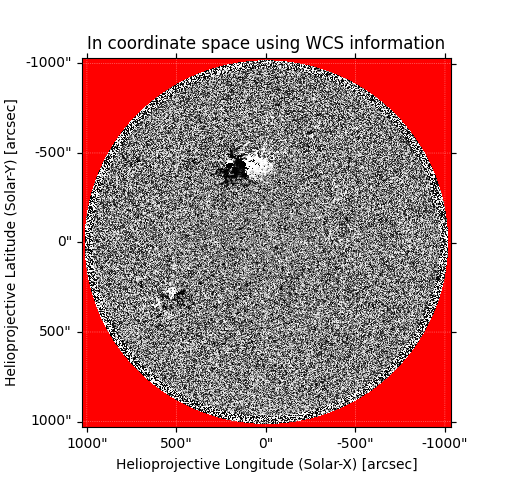
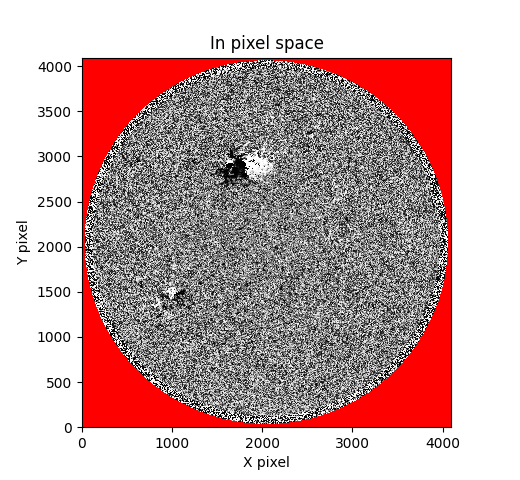
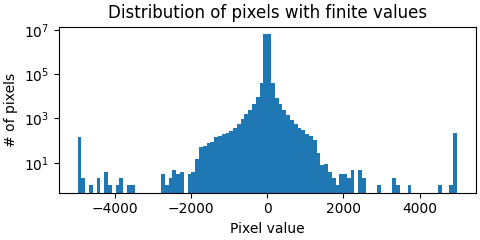
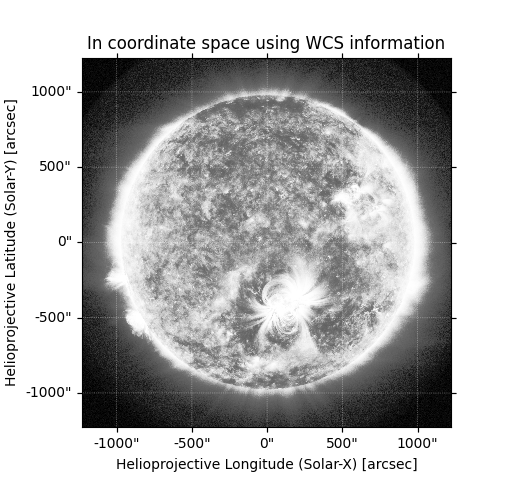
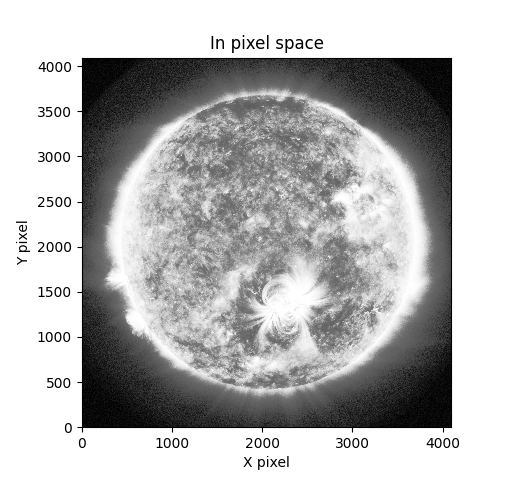
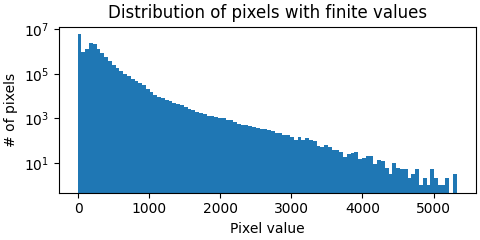

In [78]:
maps = sunpy.map.Map(files, sequence=True)
maps

In [80]:
maps.peek()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]


## Querying the Heliophysics Events Knowledgebase (HEK)

Sunpy has a client for querying the HEK, which can be used to search for flares and other kinds of events. See https://docs.sunpy.org/en/stable/guide/acquiring_data/hek.html for more details.

It's worth noting that in the upcoming sunpy 2.1 the HEK (and JSOC metadata) queries will be built into `Fido`, but the query syntax will remain largely the same.

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord

import sunpy.map

In [82]:
from sunpy.net import hek

In [83]:
client = hek.HEKClient()

In [142]:
res = client.search(
    hek.attrs.Time("2020/12/01", "2020/12/16"),
    hek.attrs.EventType('FL')
)

In [86]:
res

gs_thumburl,comment_count,hpc_bbox,frm_humanflag,hgc_coord,event_coordsys,obs_levelnum,hpc_coord,event_npixels,gs_imageurl,ar_polarity,frm_paramset,hrc_coord,event_starttime,ar_mtwilsoncls,event_type,intensmin,fl_fluence,obs_meanwavel,frm_url,skel_chaincode,bound_chaincode,noposition,fl_fluenceunit,active,intensmax,frm_versionnumber,fl_peaktempunit,fl_halphaclass,area_uncert,obs_dataprepurl,hpc_geom,hgc_bbox,intensmedian,chaincodetype,obs_channelid,event_clippedspatial,ar_noaaclass,SOL_standard,event_avg_rating,eventtype,intensunit,hpc_boundcc,event_mapurl,frm_contact,ar_penumbracls,intensmean,bound_ccstartc1,frm_name,area_atdiskcenter,frm_identifier,obs_observatory,event_description,boundbox_c2ur,obs_firstprocessingdate,boundbox_c2ll,frm_institute,hrc_bbox,refs_orig,ar_mcintoshcls,event_maskurl,bound_ccstartc2,gs_movieurl,event_score,skel_startc2,skel_startc1,fl_efoldtime,event_expires,fl_efoldtimeunit,hrc_boundcc,event_probability,intensvar,frm_daterun,event_coordunit,hpc_y,hpc_x,search_instrument,ar_numspots,kb_archivdate,kb_archivist,intenstotal,sum_overlap_scores,hgs_boundcc,intensskew,obs_includesnrt,rasterscan,obs_wavelunit,kb_archivid,search_frm_name,boundbox_c1ur,ar_noaanum,area_atdiskcenteruncert,boundbox_c1ll,event_importance_num_ratings,ar_compactnesscls,skel_curvature,event_testflag,event_c2error,hrc_r,skel_nsteps,hgs_y,obs_title,fl_peakemunit,hgs_x,hcr_checked,frm_specificid,event_title,obs_instrument,event_c1error,revision,hpc_radius,event_endtime,event_importance,event_coord2,event_coord3,event_coord1,search_observatory,area_raw,concept,event_pixelunit,hgc_boundcc,fl_peakflux,hgc_x,hrc_a,event_peaktime,hgc_y,gs_galleryid,fl_goescls,hgs_coord,ar_zurichcls,bound_ccnsteps,intenskurt,event_clippedtemporal,fl_peakfluxunit,fl_peakem,rasterscantype,search_channelid,fl_peaktemp,hgs_bbox,area_unit,obs_lastprocessingdate,refs
str168,str1,str128,str5,str35,str12,object,str30,object,str168,object,str57,str41,str19,str1,str2,object,object,float64,str82,str1,str1,str5,str1,str4,object,object,str1,str1,object,str1,str186,str125,object,str1,str5,str1,str1,str30,object,str1,str1,str1,str1,str41,str1,object,object,str32,object,str20,str4,str119,float64,str1,float64,str5,str110,str1,str1,str1,object,str161,str22,object,object,object,str1,str1,str1,object,object,str19,str10,float64,float64,str7,object,str19,str15,object,str22,str1,object,str1,str1,str2,str101,str32,float64,object,object,float64,str1,str1,object,str5,int64,float64,object,float64,str1,str1,float64,str4,str1,str19,str7,int64,str2,str19,str19,object,float64,object,float64,str4,object,str5,str1,str1,object,float64,float64,str19,float64,str1,str4,str28,str1,object,object,str1,str11,object,str1,str19,object,str120,str1,str1,object
http://sdowww.lmsal.com/sdomedia/ssw/media/ssw/ssw_client/data/ssw_service_201202_000106_23639/www/ssw_cutout_131_context_thumb.gif,0,"POLYGON((76.8 -384,153.6 -384,153.6 -307.2,76.8 -307.2,76.8 -384))",false,POINT(-24.5697732 -19.873362),UTC-HPC-TOPO,None,POINT(115.2 -345.6),None,http://sdowww.lmsal.com/sdomedia/ssw/media/ssw/ssw_client/data/ssw_service_201202_000106_23639/www/ssw_cutout_131_context_full.gif,None,DerivativeThreshold= 8.00000e-02 EndFraction= 2.50000e-01,POINT(0.374575672074888 198.434948822922),2020-12-01T00:37:56,,FL,None,None,1.31e-06,http://www.cfa.harvard.edu,,,false,,true,None,0.5099999904632568,,,None,,01030000000100000005000000333333333333534000000000000078C0333333333333634000000000000078C0333333333333634033333333333373C0333333333333534033333333333373C0333333333333534000000000000078C0,"POLYGON((-26.898697 -22.299341,-21.986782 -22.309909,-22.284769 -17.487637,-27.045973 -17.477939,-26.898697 -22.299341))",None,,131,,,SOL2020-12-01T00:37:56L336C109,None,9,,,,Paolo C. Grigis - pgrigis@cfa.harvard.edu,,None,None,Flare Detective - Trigger Module,None,Feature Finding Team,SDO,,-307.20001220703125,,-384.0,SAO,"POLYGON((0.402657 191.309932,0.425253 201.801409,0.353153 206.565051,0.325591 194.036243,0.402657 191.309932))",,,,No

This results object is a slightly customised, [astropy Table](https://docs.astropy.org/en/stable/table/index.html) which allows us to inspect it and work with the flare results. First we can list the keys.

In [87]:
res.keys()

['gs_thumburl',
 'comment_count',
 'hpc_bbox',
 'frm_humanflag',
 'hgc_coord',
 'event_coordsys',
 'obs_levelnum',
 'hpc_coord',
 'event_npixels',
 'gs_imageurl',
 'ar_polarity',
 'frm_paramset',
 'hrc_coord',
 'event_starttime',
 'ar_mtwilsoncls',
 'event_type',
 'intensmin',
 'fl_fluence',
 'obs_meanwavel',
 'frm_url',
 'skel_chaincode',
 'bound_chaincode',
 'noposition',
 'fl_fluenceunit',
 'active',
 'intensmax',
 'frm_versionnumber',
 'fl_peaktempunit',
 'fl_halphaclass',
 'area_uncert',
 'obs_dataprepurl',
 'hpc_geom',
 'hgc_bbox',
 'intensmedian',
 'chaincodetype',
 'obs_channelid',
 'event_clippedspatial',
 'ar_noaaclass',
 'SOL_standard',
 'event_avg_rating',
 'eventtype',
 'intensunit',
 'hpc_boundcc',
 'event_mapurl',
 'frm_contact',
 'ar_penumbracls',
 'intensmean',
 'bound_ccstartc1',
 'frm_name',
 'area_atdiskcenter',
 'frm_identifier',
 'obs_observatory',
 'event_description',
 'boundbox_c2ur',
 'obs_firstprocessingdate',
 'boundbox_c2ll',
 'frm_institute',
 'hrc_bbox',


Let's have a look at the flare class:

In [89]:
res['fl_goescls']

""
""
""
""
B5.6
B5.2
""
B9.2
""
""
""


Let's select only the results which have a GOES flare class.

In [93]:
res['fl_goescls'].nonzero()

(array([  4,   5,   7,  12,  17,  18,  19,  20,  22,  27,  31,  37,  40,
         45,  48,  50,  54,  57,  60,  64,  66,  71,  72,  74,  75,  77,
         78,  81,  83,  84,  87,  92,  95,  98, 100, 102, 107, 109, 114,
        119, 121, 123, 128, 136, 140, 143, 144, 147, 148, 149, 150, 151,
        152, 153, 157, 162, 163, 164, 165, 167, 168, 169, 170, 171, 173,
        174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 187,
        188, 189, 190, 191, 193, 195, 199, 200, 201, 203, 204, 205, 206,
        208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 220, 221, 223,
        225, 226, 227, 228, 230, 231, 232, 233, 235, 236, 238, 240, 241,
        243]),)

In [143]:
flares = res[res['fl_goescls'].nonzero()]
flares

gs_thumburl,comment_count,hpc_bbox,frm_humanflag,hgc_coord,event_coordsys,obs_levelnum,hpc_coord,event_npixels,gs_imageurl,ar_polarity,frm_paramset,hrc_coord,event_starttime,ar_mtwilsoncls,event_type,intensmin,fl_fluence,obs_meanwavel,frm_url,skel_chaincode,bound_chaincode,noposition,fl_fluenceunit,active,intensmax,frm_versionnumber,fl_peaktempunit,fl_halphaclass,area_uncert,obs_dataprepurl,hpc_geom,hgc_bbox,intensmedian,chaincodetype,obs_channelid,event_clippedspatial,ar_noaaclass,SOL_standard,event_avg_rating,eventtype,intensunit,hpc_boundcc,event_mapurl,frm_contact,ar_penumbracls,intensmean,bound_ccstartc1,frm_name,area_atdiskcenter,frm_identifier,obs_observatory,event_description,boundbox_c2ur,obs_firstprocessingdate,boundbox_c2ll,frm_institute,hrc_bbox,refs_orig,ar_mcintoshcls,event_maskurl,bound_ccstartc2,gs_movieurl,event_score,skel_startc2,skel_startc1,fl_efoldtime,event_expires,fl_efoldtimeunit,hrc_boundcc,event_probability,intensvar,frm_daterun,event_coordunit,hpc_y,hpc_x,search_instrument,ar_numspots,kb_archivdate,kb_archivist,intenstotal,sum_overlap_scores,hgs_boundcc,intensskew,obs_includesnrt,rasterscan,obs_wavelunit,kb_archivid,search_frm_name,boundbox_c1ur,ar_noaanum,area_atdiskcenteruncert,boundbox_c1ll,event_importance_num_ratings,ar_compactnesscls,skel_curvature,event_testflag,event_c2error,hrc_r,skel_nsteps,hgs_y,obs_title,fl_peakemunit,hgs_x,hcr_checked,frm_specificid,event_title,obs_instrument,event_c1error,revision,hpc_radius,event_endtime,event_importance,event_coord2,event_coord3,event_coord1,search_observatory,area_raw,concept,event_pixelunit,hgc_boundcc,fl_peakflux,hgc_x,hrc_a,event_peaktime,hgc_y,gs_galleryid,fl_goescls,hgs_coord,ar_zurichcls,bound_ccnsteps,intenskurt,event_clippedtemporal,fl_peakfluxunit,fl_peakem,rasterscantype,search_channelid,fl_peaktemp,hgs_bbox,area_unit,obs_lastprocessingdate,refs
str168,str1,str128,str5,str35,str12,object,str30,object,str168,object,str57,str41,str19,str1,str2,object,object,float64,str82,str1,str1,str5,str1,str4,object,object,str1,str1,object,str1,str186,str125,object,str1,str5,str1,str1,str30,object,str1,str1,str1,str1,str41,str1,object,object,str32,object,str20,str4,str119,float64,str1,float64,str5,str110,str1,str1,str1,object,str161,str22,object,object,object,str1,str1,str1,object,object,str19,str10,float64,float64,str7,object,str19,str15,object,str22,str1,object,str1,str1,str2,str101,str32,float64,object,object,float64,str1,str1,object,str5,int64,float64,object,float64,str1,str1,float64,str4,str1,str19,str7,int64,str2,str19,str19,object,float64,object,float64,str4,object,str5,str1,str1,object,float64,float64,str19,float64,str1,str4,str28,str1,object,object,str1,str11,object,str1,str19,object,str120,str1,str1,object
http://sdowww.lmsal.com/sdomedia/ssw/media/ssw/ssw_client/data/ssw_service_201130_172057_18386/www/ssw_cutout_193_context_thumb.gif,0,"POLYGON((17.051346 2.540207,17.051346 2.540207,17.051346 2.540207,17.051346 2.540207,17.051346 2.540207))",false,POINT(-120.97559 -27),UTC-HGS-TOPO,None,POINT(-866.45778 -441.727518),None,http://sdowww.lmsal.com/sdomedia/ssw/media/ssw/ssw_client/data/ssw_service_201130_172057_18386/www/ssw_cutout_193_context_full.gif,None,"AIA20201201_010000_0094.fits,AIA20201201_010700_0094.fits",POINT(1.00000520906895 117.012872344099),2020-12-01T01:00:00,,FL,None,None,9.4e-07,http://sohowww.nascom.nasa.gov/solarsoft/packages/gevloc/idl/ssw_flare_locator.pro,,,false,,true,None,None,,,None,,010300000001000000050000001A868F88A9DB8BC00514EAE9A32B7DC01A868F88A9DB8BC00514EAE9A30B7AC01A868F88A94B8AC00514EAE9A30B7AC01A868F88A94B8AC00514EAE9A32B7DC01A868F88A9DB8BC00514EAE9A32B7DC0,"POLYGON((-30.97559 1,-30.97559 1,-30.97559 1,-30.97559 1,-30.97559 1))",None,,EUV,,,SOL2020-12-01T01:00:00L240C117,None,9,,,,Samuel L. Freeland,,None,None,SSW Latest Events,None,SolarSoft,SDO,,-26.0,,-28.0,LMSAL,"POLYGON((0.017726 278.473264,0.017726 278.473264,0.017726 278.473264,0.017726 278.473264,0.017726 278.473264))",,,,None,http://sdowww.lmsal.com/sd

In [94]:
flares['event_peaktime', 'fl_goescls', 'fl_peakflux', 'hpc_coord']

event_peaktime,fl_goescls,fl_peakflux,hpc_coord
str19,str4,object,str30
2020-12-01T01:06:00,B5.6,None,POINT(-866.45778 -441.727518)
2020-12-01T01:59:00,B5.2,None,POINT(-848.33694 -444.52341)
2020-12-01T02:42:00,B9.2,None,POINT(130.696218 -282.953874)
2020-12-01T04:27:00,C3.8,None,POINT(-864.6876 -442.492086)
2020-12-01T05:54:00,B5.4,None,POINT(-888.40944 -395.790114)
2020-12-01T07:21:00,C1.2,None,POINT(-866.55468 -398.782176)
2020-12-01T15:52:00,B5.7,None,POINT(341.54877 -361.369914)
2020-12-01T22:41:00,B6.1,None,POINT(-838.0347 -444.91806)
2020-12-01T23:20:00,C1.4,None,POINT(413.56245 -263.622294)


This hpc_coord isn't very useful, so let's convert it into a coordinate object we can use:

In [95]:
point = flares['hpc_coord'][0]
point

'POINT(-866.45778 -441.727518)'

In [96]:
point = point.strip("POINT()")
point

'-866.45778 -441.727518'

In [97]:
point = point.split(" ")
point

['-866.45778', '-441.727518']

In [98]:
float(point[0])

-866.45778

In [100]:
list(map(float, point))

[-866.45778, -441.727518]

In [102]:
np.float64(point)

array([-866.45778 , -441.727518])

In [105]:
coords = []
for c in flares['hpc_coord']:
    coords.append(c.strip("POINT()").split())

In [144]:
coords = np.float64([c.strip("POINT()").split() for c in flares['hpc_coord']])

In [145]:
carr = np.float64([c.strip("POINT()").split() for c in flares['hgc_coord']])

Having cleaned up the coordinates, we can inject them back into the table, because you can put astropy coordinates into an astropy table.

In [130]:
flares['hpc_coord'] = SkyCoord(coords, unit=u.arcsec,
                               obstime=flares['event_peaktime'],
                               observer="earth",
                               frame="helioprojective")

In [147]:
flares['hgc_coord'] = SkyCoord(carr, unit=u.deg,
                               obstime=flares['event_peaktime'],
                               observer="earth",
                               frame="heliographic_carrington")

In [148]:
flares['event_peaktime', 'fl_goescls', 'hpc_coord', 'hgc_coord']

event_peaktime,fl_goescls,hpc_coord,hgc_coord
,,,"deg,deg,km"
str19,str4,str30,object
2020-12-01T01:06:00,B5.6,POINT(-866.45778 -441.727518),"239.02441,-27.0,695700.0"
2020-12-01T01:59:00,B5.2,POINT(-848.33694 -444.52341),"249.53021,-27.0,695700.0"
2020-12-01T02:42:00,B9.2,POINT(130.696218 -282.953874),"335.31056,-16.0,695700.0"
2020-12-01T04:27:00,C3.8,POINT(-864.6876 -442.492086),"240.30385,-27.0,695700.0"
2020-12-01T05:54:00,B5.4,POINT(-888.40944 -395.790114),"236.38866000000002,-24.0,695700.0"
2020-12-01T07:21:00,C1.2,POINT(-866.55468 -398.782176),"247.61075,-24.0,695700.0"
2020-12-01T15:52:00,B5.7,POINT(341.54877 -361.369914),"341.97077,-21.0,695700.0"
2020-12-01T22:41:00,B6.1,POINT(-838.0347 -444.91806),"241.22769,-27.0,695700.0"


Now let's create a simple map and plot the locations of all the flares on it.

In [149]:
shape = (180, 360)

In [150]:
header = sunpy.map.make_fitswcs_header(shape,
                                       SkyCoord(0, 0, unit=u.deg,
                                                obstime=flares['event_peaktime'][0],
                                                observer="earth",
                                                frame="heliographic_carrington"),
                                       scale=[1, 1]*u.deg/u.pix,
                                       projection_code='CEA'
                                      )

In [151]:
empty = sunpy.map.Map(np.zeros(shape), header)

In [155]:
plt.figure()
ax = plt.subplot(projection=empty)
empty.plot(cmap="Blues")
empty.draw_grid(color='k')
ax.plot_coord(flares[[cl.startswith('C') for cl in flares['fl_goescls']]]['hgc_coord'], "x")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [156]:
from sunpy.net import hek2vso

In [157]:
c = hek2vso.H2VClient()

In [164]:
res = c.translate_and_query(res[[cl.startswith('C') for cl in res['fl_goescls'] if c]])

100%|██████████| 12/12 [00:34<00:00,  2.90s/records]


In [165]:
res = [r[0] for r in res]

In [166]:
from sunpy.net import vso

In [167]:
vclient = vso.VSOClient()

In [170]:
files = vclient.fetch(res)

AttributeError: 'QueryResponse' object has no attribute 'fileid'